
<h1 style="color:#6495ED; font-size: 55px; justify-content: center; align-items: center; margin: 15px " >SOLUÇÕES NUMERICAS EM EQUAÇÕES DIFERENCIAIS I</h1>

 <h2 style= " color: #00BFFF" > Autor: <em>Andrew Galvão de Figueiredo Oliveira </em></h2>
 <h2 style= " color: #00BFFF; font-size: 12px"> Graduando em Matemática Computacional pela UFPB </h2>

--------


## Imports

In [21]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numba import jit

## Solução analitica

In [2]:
from scipy.integrate import odeint

def analitic(f, y0, x):
    return odeint(f, y0, x)



<h1 style="color:#6495ED; font-size: 35px; justify-content: center; align-items: center; margin: 15px " >Métodos</h1>

----

## Método Euler

In [3]:
def euler(f, y0, h, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        y[i+1] = y[i] + h * f(x[i], y[i])
    label = 'euler'
    return y, label
    
    

## Método de Euler Modificado

In [4]:
def euler_modificado(f, y0, h, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        y[i+1] = y[i] + h * f( x[i] + (0.5*h), y[i] + ((0.5*h) * f(x[i],y[i]) ) )
    label = "euler_modificado"
    return y, label
    

## Método de Euler Melhorado (Heun)


In [5]:
def euler_melhorado(f, y0, h, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        y[i+1] = y[i] + (h*0.5) * f(x[i],y[i]) + (0.5*h)*f(x[i] + h, y[i] + h*f(x[i], y[i]))
    label = 'euler_melhorado'
    return y, label
    

## Método das Diferenças Finitas

### Método RK3

In [6]:
def RK3(f, y0, h, x):
    n=len(x)
    y=np.zeros(n)
    y[0]=y0
    for i in range(0, n-1):
        k1 = f(x[i], y[i])
        k2 = f( x[i] + (0.5*h), y[i] + (0.5*h) * k1 )
        k3 = f( x[i] + h, y[i] - h*k1 + 2*h*k2 )
        y[i+1] = y[i] + (1.0/6.0)*(k1 + 4*k2 + k3)
        
    label = 'RK3'
    return y, label

### Método RK4

In [13]:
def RK4(f, y0, h, x):
    n=len(x)
    y=np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + (0.5*h), y[i] + (0.5*h)*k1)
        k3 = f(x[i] + (0.5*h), y[i] + (0.5*h)*k2)
        k4 = f(x[i] + h, y[i] + h*k3)
        y[i+1] = y[i] + ( (1.0/6.0) * h * (k1 + 2*k2 + 2*k3 + k4) )
        
    label = 'RK4'
    return y, label


### Método de Adams-Moulton

In [8]:
def Adams_Moulton(f, y0, h, x):
    n = len(x)
    y=np.zeros(n)
    y[0] = y0
    for i in range(0,n-1):
        y[i+2] = y[i+1] + (h/12) * (-f(x[i],y[i]) + 8*f(x[i+1], y[i+1]) + 5*f(x[i+2], y[i+2]) )
    
    label = 'Adams_Moulton' 
    return y, label

### Método de Adams-Bashforth

In [9]:
def Adams_Bashforth(f, y0, h, x):
    n = len(x)
    y = np.zeros(n)
    y[0] = y0
    for i in range(0, n-1):
        y[i+2] = y[i+1] + (h/2) * (-f(x[i],y[i]) + 3*f(x[i+1], y[i+1]))
    
    label = 'Adams_Bashforth' 
    return y, label

## Start :

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

<function matplotlib.pyplot.show(*args, **kw)>

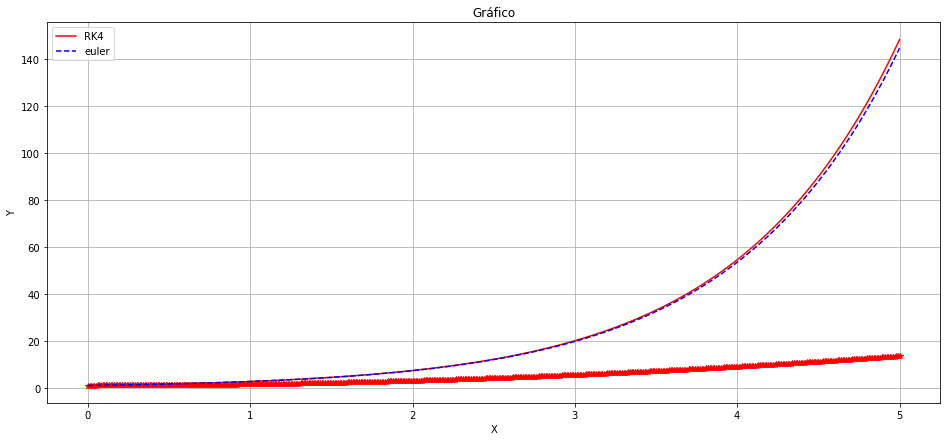

In [20]:
# Dados de inicialização

# Funcão
def f(x,y):
    return y

    
x0 = 0
x = 5
y0= 1
h = 0.01


n = (int)((x - x0)/h)
x = np.arange(x0,x+h,h)
print(x)

# Métodos
y_analitic = odeint(f, y0, x)
y_numeric, label1  = RK4(f, y0, h, x) 
y_numeric1, label2  = euler(f, y0, h, x) 

# Plot

plt.plot(x, y_analitic, '*r')
plt.plot(x, y_numeric, 'r',label=label1)
plt.plot(x, y_numeric1, '--b', label=label2)


plt.title("Gráfico")
plt.legend()

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.rcParams['figure.figsize'] = (16,7)
plt.show
